In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
obesity_data = pd.read_csv('../data/provided-data-raw/Nutrition_Physical_Activity_and_Obesity_Data.csv')
meat_production = pd.read_csv('../data/provided-data-raw/Meat_Stats_Meat_Production.csv')

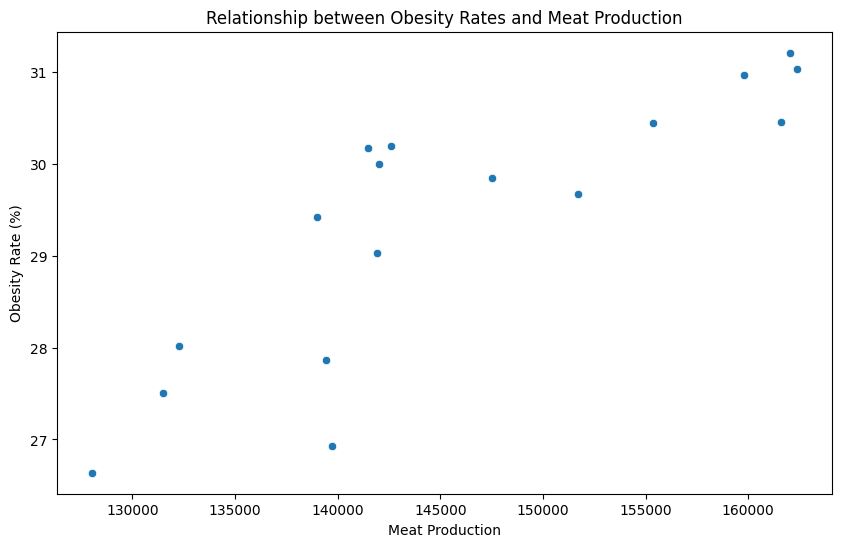

Correlation between Obesity Rates and Meat Production: 0.8433582881667329


In [3]:
# Example 1: Relationship between obesity rates and meat production
meat_production_filtered = meat_production[meat_production['Year'] >= 1944]
meat_production_filtered.loc[:, 'Production'] = meat_production_filtered['Production'].str.replace(',', '').astype(float)
meat_production_agg = meat_production_filtered.groupby('Year').agg({'Production': 'sum'}).reset_index()

obesity_data_filtered = obesity_data[obesity_data['YearEnd'] >= 1944].dropna(subset='Data_Value')
obesity_data_agg = obesity_data_filtered.groupby('YearEnd').agg({'Data_Value': 'mean'}).reset_index()

obesity_meat_data = meat_production_agg.merge(obesity_data_agg, left_on='Year', right_on='YearEnd')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_meat_data, x='Production', y='Data_Value')
plt.title('Relationship between Obesity Rates and Meat Production')
plt.xlabel('Meat Production')
plt.ylabel('Obesity Rate (%)')
plt.show()

correlation = obesity_meat_data['Data_Value'].corr(obesity_meat_data['Production'])
print(f'Correlation between ChilObesity Rates and Meat Production: {correlation}')